### 목표
- 버섯데이터를 통해 의사결정나무 분류 실습
- 8124 개 버섯데이터를 활용하여 식용버섯, 독성버섯 분류
- 의사결정나무 그래프화 내부 학습모습 시각화
- 특성의 중요도

In [1]:
# 라이브러리 불러오기 
import numpy as np # 수치계산용 라이브러리
import pandas as pd # 표를 다룰때 사용
import matplotlib.pyplot as plt # 그래프(시각화) 라이브러리
# 머신러닝 라이브러리 
from sklearn.tree import DecisionTreeClassifier # 의사결정나무
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # 분류용 모델 평가도구 (정확도)

In [2]:
# 2. 데이터 수집
# 데이터 불러오기 (data)
data = pd.read_csv('data/mushroom.csv')
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
#4. 데이터 전처리
# 결측치 확인
data.info()
# 결측치가 없음 -> 채울 필요 없음!
# DtYPE -> 머신러닝 학습을 위해서는 데이터타입이 숫자형태!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 데이터 분리
- 문제(X), 정답(y)
- 훈련용(train), 테스트용(test)로 분리

In [4]:
X=data.iloc[:, 1:]
y=data.iloc[:, 0]
print(X.shape, y.shape)

(8124, 22) (8124,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=7)

In [6]:
# 확인
print('훈련용 문제 : ', X_train.shape)
print('훈련용 정답 : ', y_train.shape)
print('테스트용 문제 : ', X_test.shape)
print('테스트용 문제 : ', y_test.shape)

훈련용 문제 :  (5686, 22)
훈련용 정답 :  (5686,)
테스트용 문제 :  (2438, 22)
테스트용 문제 :  (2438,)


In [7]:
# 데이터 기술통계량 확인
X.describe()
# count : 전체 데이터의 개수
# unique : 중복되지 않은 유일한 알파벳의 개수
# top : 알파벳에서 가장 많이 등장한 알파벳
# freq : 가장 많이 등장한 알파벳의 횟수

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
# 정답데이터 확인
y.value_counts()
# 정답데이터에서 각 클래스별로 비슷한 개수로 수집되어있는 것을 확인

poisonous
e    4208
p    3916
Name: count, dtype: int64

### 인코딩
- 범주형 -> 수치형
    1. 원핫인코딩 (우선순위가 없음)
    2. 라벨인코딩(레이블인코딩) (우선순위가 있음)

In [9]:
# 원핫인코딩 
# 값의 크고 작음 (우선순위)의 의미가 없는 데이터에 적용
# 하나의 컬럼에 있는 유일한 (unique) 데이터의 갯수만큼 컬럼을 생성 
# 있으면 1, 없으면 0을 채워서 수치화 하는 방법 
# pd.get_dummies(데이터)
X_one_hot = pd.get_dummies(X, dtype = int)
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [10]:
# 레이블인코딩
# 값의 우선순위가 있을때 진행하는 인코딩방법
# 예) 사장,이사, 팀장, 대리, 사원 / A, B, C, D, F
# 서식지 컬럼을 가져와서 레이블인코딩 진행 (예시를 위해 한번 해보는 것)
data['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [11]:
# 우선순위가 높은 데이터에 더 큰 숫자를 맵핑
hb_dict = {'u' : 1,
           'g' : 2,
           'm' : 3,
           'd' : 4,
           'p' : 5,
           'w' : 6,
           'l' : 7}

# 키 값에 매칭된 숫자로 변경
data['habitat'].map(hb_dict)
# 알파벳이 숫자로 바뀐 것을 확인

0       1
1       2
2       3
3       1
4       2
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

In [12]:
# 인코딩한 문제데이터를 train과 test 분리 담아주기
X_train, X_test, y_train, y_test = train_test_split(X_one_hot,y, test_size=0.3, random_state=7)

In [13]:
# 확인
print('훈련용 문제 : ', X_train.shape)
print('훈련용 정답 : ', y_train.shape)
print('테스트용 문제 : ', X_test.shape)
print('테스트용 문제 : ', y_test.shape)

훈련용 문제 :  (5686, 117)
훈련용 정답 :  (5686,)
테스트용 문제 :  (2438, 117)
테스트용 문제 :  (2438,)


In [14]:
# 모델객체생성 / 하이퍼파라미터 조절
tree_model = DecisionTreeClassifier()

In [15]:
# 모델학습
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# 모델평가
tree_model.score(X_test,y_test)

1.0

#### 하이퍼파라미터를 조절한 모델 학습, 평가

In [17]:
DecisionTreeClassifier(max_depth=True, min_samples_leaf = 30, min_samples_split=30, max_leaf_nodes=True)

DecisionTreeClassifier(max_depth=True, max_leaf_nodes=True, min_samples_leaf=30,
                       min_samples_split=30)

In [18]:
# 모델학습
tree_model.fit(X_train, y_train)
# 모델평가
tree_model.score(X_test,y_test)

1.0

### 하이퍼파라미터를 조절한 모델 학습, 평가

In [19]:
DecisionTreeClassifier()

DecisionTreeClassifier()

### 교차검증
- 모델의 일반화 성능확인을 위함!!
- 일반화 : 어떤 데이터가 들어와도 비슷한 성능을 내는 모델
- 방법 : 훈련데이터 내에서 또다시 훈련용과 테스트용 데이터로 분리하여 교차로 검증
- 각각의 훈련과 평가에서 정확도를 출력하여 비슷한 성능을 내는지 확인
- k-fold cross-validation

In [21]:
from sklearn.model_selection import cross_val_score
# cross_val_score(모델명, 훈련용문제, 훈련용 정답, cv = 교차검증횟수)
cross_val_score(tree_model, X_train, y_train, cv=5)

# tree_model 의 교차검증 결과
# 어떤 데이터가 들어와도 비슷한 성능을 내는것을 확인
# 대부분의 데이터에서 1에 가까운 성능을 내고 있음
# 과대적합의 확률이 낮겠구나!

array([1.        , 1.        , 1.        , 0.99912049, 1.        ])

In [28]:
# 하이퍼 파라미터 조절을 진행
# max_depth = 3
tree_model2 = DecisionTreeClassifier(max_depth=3)

In [29]:
# 모델 학습
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
# 교차 검증
cross_val_score(tree_model2, X_train, y_train, cv=5)

array([0.98242531, 0.98680739, 0.98504837, 0.97977133, 0.98592788])

In [31]:
# 모델 평가
tree_model2.score(X_test,y_test)

0.9868744872846595

## tree 모델 내부 시각화

In [32]:
!pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 784.8 kB/s eta 0:00:00


In [34]:
import os
os.environ['PATH'] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'

In [39]:
from sklearn.tree import export_graphviz

# export_graphviz(학습한 모델명, out_file='내보낼 파일이름.확장자')
export_graphviz(tree_model, out_file='data/tree1.dot',
                class_names=['독','식용'], # 정답데이터의 이름 설정
                feature_names=X_one_hot.columns, # 특성의 이름
               filled = True) # 노드들의 색 출력

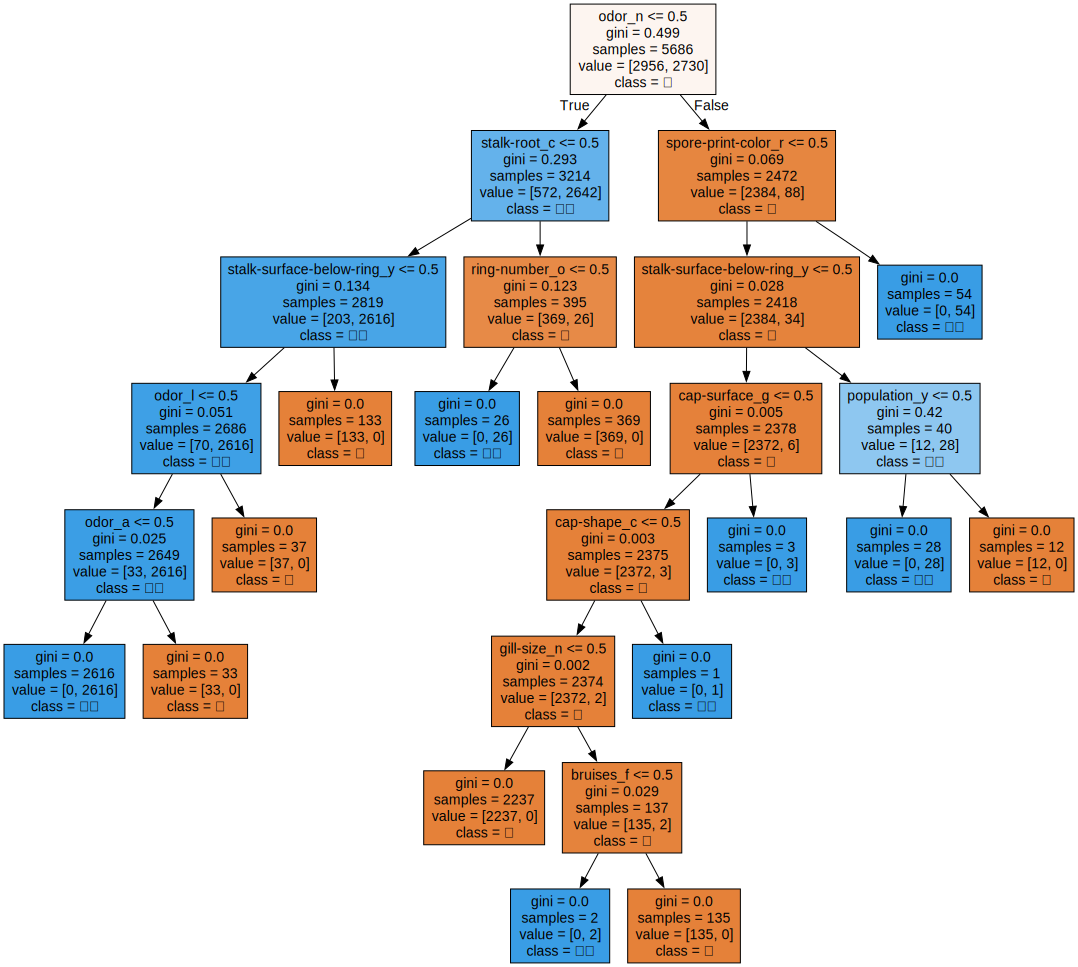

In [40]:
# dot 파일 불러와서 출력
import graphviz
with open ('data/tree1.dot', encoding='utf-8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph)) # 그래프로 출력해주는 코드

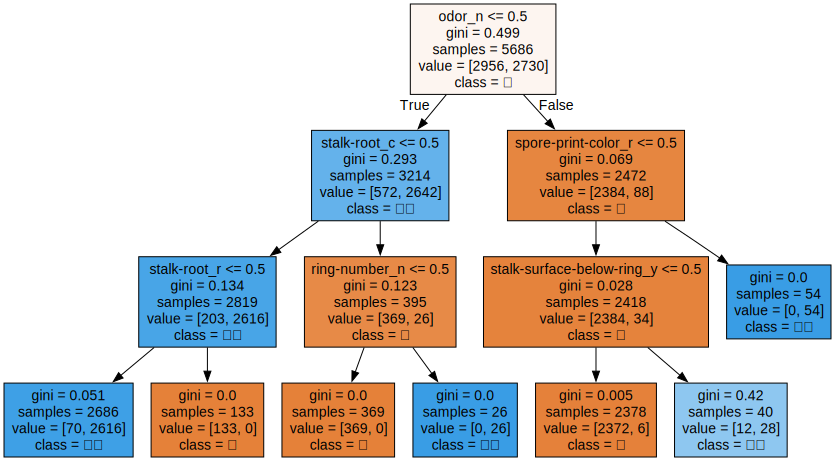

In [41]:
# export_graphviz(학습한 모델명, out_file='내보낼 파일이름.확장자')
export_graphviz(tree_model2, out_file='data/tree2.dot',
                class_names=['독','식용'], # 정답데이터의 이름 설정
                feature_names=X_one_hot.columns, # 특성의 이름
               filled = True) # 노드들의 색 출력

# dot 파일 불러와서 출력
import graphviz
with open ('data/tree2.dot', encoding='utf-8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph)) # 그래프로 출력해주는 코드

### 특성 중요도
- 지도학습 모델에서는 각 데이터의 특성 중요도를 출력 확인해볼 수 있다!
- 각 특성마다 정답에 미치는 영향을 확인 > 수치로 확인 가능
- 0-1 사이의 값을 중요도로 가지며 1에 가까울수록 중요한 특성
- 전체 특성의 중요도의 합은 1이된다.
- tree 모델에서는 특성의 중요도가 높은 특성을 상단의 질문으로 배치

In [52]:
# tree)model 의 특성중요됴 확인
fi = tree_model.feature_importances_
fi
# 부동 소수점
# e-07 = - 뒤에 있는 숫자만큼 소숫점을 앞으로 이동시켜서 해석

array([0.00000000e+00, 7.03112501e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10578942e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.38861859e-03, 0.00000000e+00, 2.29619887e-02, 0.00000000e+00,
       0.00000000e+00, 2.50743114e-02, 0.00000000e+00, 6.08901883e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.93849405e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.81454492e-01, 0.00000000e+00, 0.00000000e+00,
      

In [53]:
# DataFrame(fi)
df_fi = pd.DataFrame(fi, columns=['특성중요도'], index = X_one_hot.columns)
df_fi

,특성중요도
cap-shape_b,0.000000
cap-shape_c,0.000703
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [56]:
# 내림차순 정렬
pd.set_option('display.max_rows',None)
df_fi.sort_values(by ='특성중요도', ascending=False)
# odor_n 정답데이터에 가장 많은 영향을 끼치고 있구나 -> 가장 상단노의 질문 (그래프)
# 생각보다 정답에 영향을 미치는 특성이 적었군!
# 현재의 mushroom 데이터는 odor_n 이 60% 이상의 영향을 미치고 있구나
# 학습이 용이한 이유 !! > 정확도가 높게 평가되는구나 ~

,특성중요도
odor_n,0.608902
stalk-root_c,0.181454
stalk-surface-below-ring_y,0.098180
spore-print-color_r,0.036178
odor_l,0.025074
odor_a,0.022962
ring-number_o,0.017114
population_y,0.005919
cap-surface_g,0.002106
bruises_f,0.001389
